### Estuardo J. Díaz García
-----
# Laboratorio 3. Fracturas. Parte 4

## K-NN y matriz de confusión

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df_bmd = pd.read_csv("bmd.csv",sep=",")

df_bmd

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


In [4]:
df_bmd.describe()

,id,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,9102.556213,63.631531,64.665680,160.254438,19.739645,0.783104
std,8744.623598,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.000000,35.814058,36.000000,142.000000,5.000000,0.407600
25%,2018.000000,54.424211,56.000000,154.000000,9.000000,0.670800
50%,6702.000000,63.487837,64.500000,160.500000,14.000000,0.786100
75%,17100.000000,72.080558,73.000000,166.000000,24.000000,0.888800
max,24208.000000,88.753795,96.000000,177.000000,96.000000,1.362400


In [5]:
print(df_bmd.groupby("fracture").size())

fracture
fracture        50
no fracture    119
dtype: int64


In [6]:
#Convertimos la variable fracture en una dummy, en donde "no fracture" = 0 y "fracture" = 1:
df_bmd.loc[df_bmd["fracture"] == "no fracture", "fracture"] = 0
df_bmd.loc[df_bmd["fracture"] == "fracture", "fracture"] = 1

#Convertimos la variable sex en una dummy, en donde "F" = 0 y "M" = 1:
df_bmd.loc[df_bmd["sex"] == "F", "sex"] = 0
df_bmd.loc[df_bmd["sex"] == "M", "sex"] = 1

In [7]:
df_bmd

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,0,0,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,0,0,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,1,0,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,0,0,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,1,0,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,1,1,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,0,1,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,1,1,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,1,1,70.0,166.0,No medication,14,0.8072


In [8]:
x = df_bmd[["bmd"]]
y = df_bmd["fracture"]
y=y.astype('int')
#x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(135, 1)
(34, 1)
(135,)
(34,)


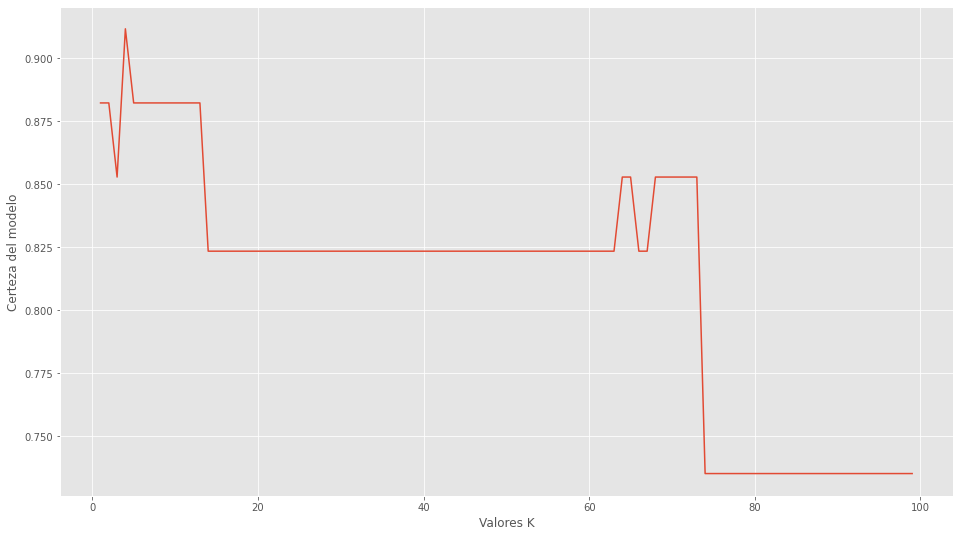

[0.8823529411764706, 0.8823529411764706, 0.8529411764705882, 0.9117647058823529, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058,

In [9]:
k_range = range(1,100)
certeza = {}
certeza_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    certeza[k] = metrics.accuracy_score(y_test,y_hat)
    certeza_list.append(metrics.accuracy_score(y_test,y_hat))
    
plt.plot(k_range,certeza_list)
plt.xlabel("Valores K")
plt.ylabel("Certeza del modelo")
plt.show()

print(certeza_list)
#Vemos que la certeza el modelo llega a un máxima certeza en k=7, la mejor variable para estimar es bmd

In [11]:
k=4
fractura_pred = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train) #entrenamos el modelo
y_hat = fractura_pred.predict(x_test) #lo corremos con el test de prueba

In [12]:
print(confusion_matrix(y_test, y_hat))

#Vemos que 31 de 34 datos fueron clasificados correctamente

[[23  2]
 [ 1  8]]
